<a href="https://colab.research.google.com/github/voilszee/kelompok-11-apm/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
from sklearn.cluster import KMeans

In [2]:
#Upload Dataset
from google.colab import files
Uploads = files.upload()

Saving coffe.csv to coffe.csv


In [3]:
#Baca Dataset
df = pd.read_csv(io.BytesIO(Uploads['coffe.csv']))
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD


In [4]:
#Ekstrak Data Feature
x = df.iloc[:, [2,5]].values

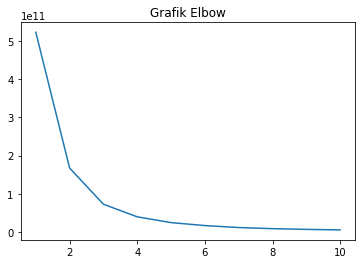

In [5]:
#Nilai K Optimal
wcss_list= []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('Grafik Elbow')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state = 42)
y_predict= kmeans.fit_predict(x)

In [7]:
df['cluster'] = kmeans.labels_
display(df)

,Date,Open,High,Low,Close,Volume,Currency,cluster
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD,0
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD,0
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD,0
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD,0
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD,0
...,...,...,...,...,...,...,...,...
5669,2022-05-16,224.00,224.00,223.50,225.80,5,USD,0
5670,2022-05-17,224.00,229.35,220.55,227.20,18764,USD,2
5671,2022-05-18,226.50,226.50,215.75,217.60,18109,USD,2
5672,2022-05-19,218.00,219.40,213.20,218.70,14519,USD,2


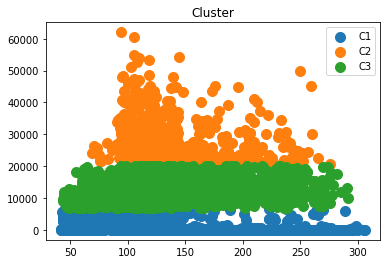

In [8]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, label = 'C1')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, label = 'C2')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, label = 'C3')
plt.title('Cluster')
plt.legend(bbox_to_anchor=(1,1))
plt.show()